前面部分由天池分享，后一半补充了长宽比的代码

### 绘图模块

In [14]:
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family']='sans-serif'
plt.rcParams['figure.figsize'] = (10.0, 10.0)

### 读取json标注文件

In [21]:
import json

ann_json = '../data/chongqing1_round1_train1_20191223/annotations.json'
images_file = '../data/chongqing1_round1_train1_20191223/images/'
with open(ann_json) as f:
    ann=json.load(f)

### 可视化某张图片的标注信息

In [7]:
# coco json_file


import json
import os
import cv2
import matplotlib.pyplot as plt
def visualize(image_dir, annotation_file, file_name):
    '''
    Args:
        image_dir (str): image directory
        annotation_file (str): annotation (.json) file path
        file_name (str): target file name (.jpg)
    Returns:
        None
    Example:
        image_dir = "./images"
        annotation_file = "./annotations.json"
        file_name = 'img_0028580.jpg'
        visualize(image_dir, annotation_file, file_name)
    '''
    image_path = os.path.join( image_dir, file_name )
    assert os.path.exists( image_path ), "image path not exist."
    assert os.path.exists( annotation_file ), "annotation file path not exist"
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    with open(annotation_file) as f:
        data = json.load(f)
    image_id = None
    for i in data['images']:
        if i['file_name'] == file_name:
            image_id = i['id']
            break
    if not image_id:
        print("file name {} not found.".format(file_name))
    large_img = True if max( image.shape[0], image.shape[1] ) > 1000 else False
    linewidth = 10 if large_img else 2
    for a in data['annotations']:
        if a['image_id'] == image_id:
            bbox = [int(b) for b in a['bbox']]
            bbox[2] = bbox[2] + bbox[0] - 1
            bbox[3] = bbox[3] + bbox[1] - 1
            cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255, 0, 0), linewidth )
    if large_img:
        plt.figure(figsize=(12,10))
    else:
        plt.figure(figsize=(5,5))
    plt.imshow(image)
    plt.show()
    return

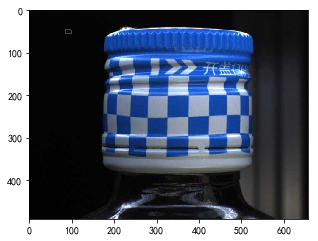

In [15]:
visualize(images_file,ann_json,'img_0006010.jpg')

### 查看图片尺寸信息

In [22]:
print('标签类别:')
print('类别数量：',len(ann['categories']))
print('训练集图片数量：',len(ann['images']))
print('训练集标签数量：',len(ann['annotations']))
ann['categories']

标签类别:
类别数量： 11
训练集图片数量： 4516
训练集标签数量： 6945


[{'id': 1, 'name': '瓶盖破损', 'supercategory': '瓶盖破损'},
 {'id': 9, 'name': '喷码正常', 'supercategory': '喷码正常'},
 {'id': 5, 'name': '瓶盖断点', 'supercategory': '瓶盖断点'},
 {'id': 3, 'name': '瓶盖坏边', 'supercategory': '瓶盖坏边'},
 {'id': 4, 'name': '瓶盖打旋', 'supercategory': '瓶盖打旋'},
 {'id': 0, 'name': '背景', 'supercategory': '背景'},
 {'id': 2, 'name': '瓶盖变形', 'supercategory': '瓶盖变形'},
 {'id': 8, 'name': '标贴气泡', 'supercategory': '标贴气泡'},
 {'id': 6, 'name': '标贴歪斜', 'supercategory': '标贴歪斜'},
 {'id': 10, 'name': '喷码异常', 'supercategory': '喷码异常'},
 {'id': 7, 'name': '标贴起皱', 'supercategory': '标贴起皱'}]

### 瓶身与瓶盖图片的大小

In [5]:
total=[]
for img in ann['images']:
    hw=(img['height'],img['width'])
    total.append(hw)
unique=set(total)
for k in unique:
    print('长宽为(%d,%d)的图片数量为：'%k,total.count(k))
    
##可以看出 瓶盖和瓶身图片长宽是固定的，而且瓶身图片相对少很多

长宽为(492,658)的图片数量为： 4105
长宽为(3000,4096)的图片数量为： 411


### 各类别数目

In [17]:
##创建类别标签字典
category_dic=dict([(i['id'],i['name']) for i in ann['categories']])

counts_label=dict([(i['name'],0) for i in ann['categories']])
for i in ann['annotations']:
    counts_label[category_dic[i['category_id']]]+=1
counts_label

{'喷码异常': 199,
 '喷码正常': 489,
 '标贴歪斜': 186,
 '标贴气泡': 443,
 '标贴起皱': 384,
 '瓶盖变形': 705,
 '瓶盖坏边': 656,
 '瓶盖打旋': 480,
 '瓶盖断点': 614,
 '瓶盖破损': 1619,
 '背景': 1170}

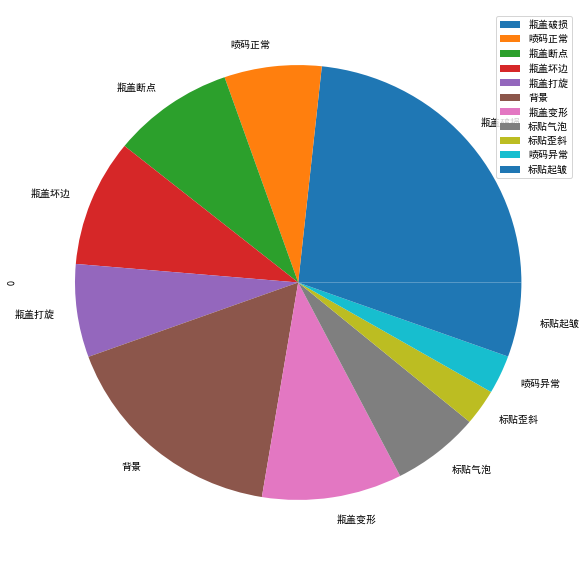

In [18]:
indexs=counts_label.keys()
values=counts_label.values()
Count_df=pd.DataFrame(list(values),index=indexs)
Count_df.plot(kind='pie',y=Count_df.columns,)
plt.show()

### 各类别标签数量直方图

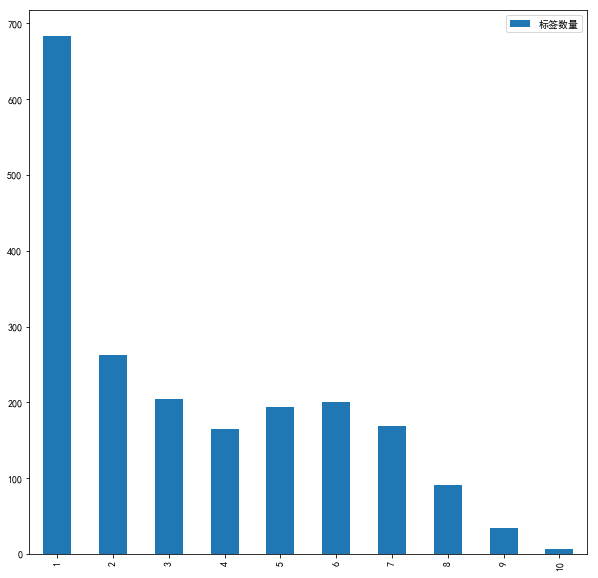

In [19]:
annoto_count={}
for i in a['annotations']:
    annoto_count[i['id']]=annoto_count.setdefault(i['id'],0)+1
indes_list=set(annoto_count.values())
values_count=[list(annoto_count.values()).count(i) for i in indes_list]
pd.DataFrame(values_count,index=indes_list,columns=['标签数量']).plot(kind='bar')

In [ ]:
1	瓶盖破损	0.15
2	瓶盖变形	0.09
3	瓶盖坏边	0.09
4	瓶盖打旋	0.05
5	瓶盖断点	0.13
6	标贴歪斜	0.05
7	标贴起皱	0.12
8	标贴气泡	0.13
9	正常喷码	0.07
10	异常喷码	0.12

### 标注框宽高比

In [176]:
box_w = []
box_h = []
box_wh = []
categorys_wh = [[] for j in range(10)]
for a in ann['annotations']:
    if a['category_id'] != 0:
        box_w.append(round(a['bbox'][2],2))
        box_h.append(round(a['bbox'][3],2))
        wh = round(a['bbox'][2]/a['bbox'][3],0)
        if wh <1 :
            wh = round(a['bbox'][3]/a['bbox'][2],0)
        box_wh.append(wh)
        categorys_wh[a['category_id']-1].append(wh)

不同类别的宽高比

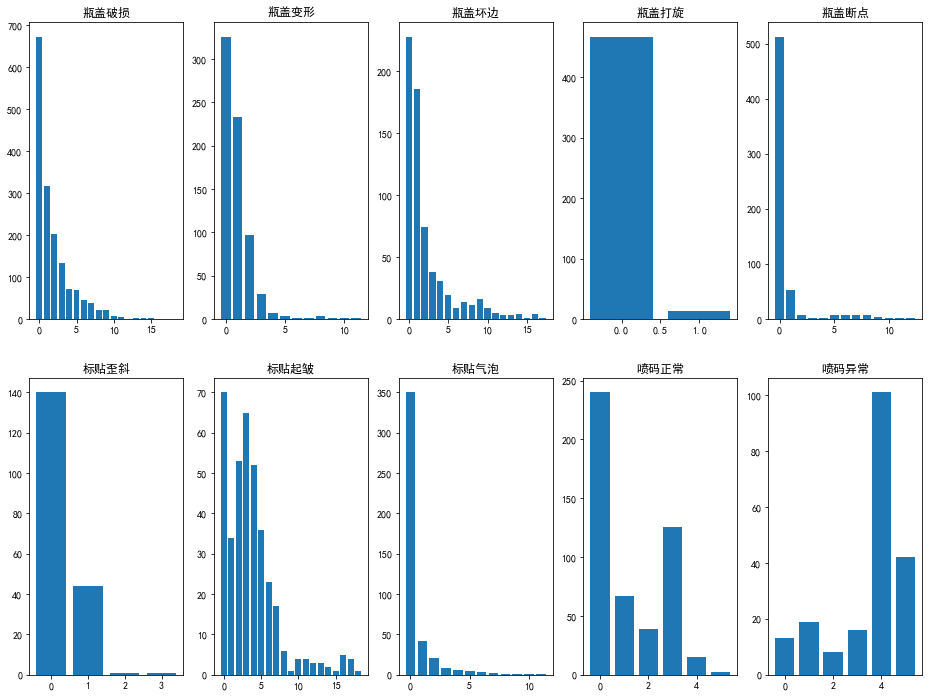

In [237]:
i = 0 
plt.figure(figsize=(16,12))
for c_wh in categorys_wh:
    # 统计每种宽高比的个数
    c_wh_unique = list(set(c_wh))
    c_wh_count=[c_wh.count(i) for i in c_wh_unique]

    # 绘图
    plt.subplot(2,5,i+1)
    wh_df = pd.DataFrame(c_wh_count,index=c_wh_unique,columns=[category_dic[i+1]])
#     wh_df.plot(kind='bar')
    plt.title(category_dic[i+1])
    plt.bar(range(wh_df.shape[0]),wh_df[category_dic[i+1]])
    
    i+=1
    

所有样本的宽高比

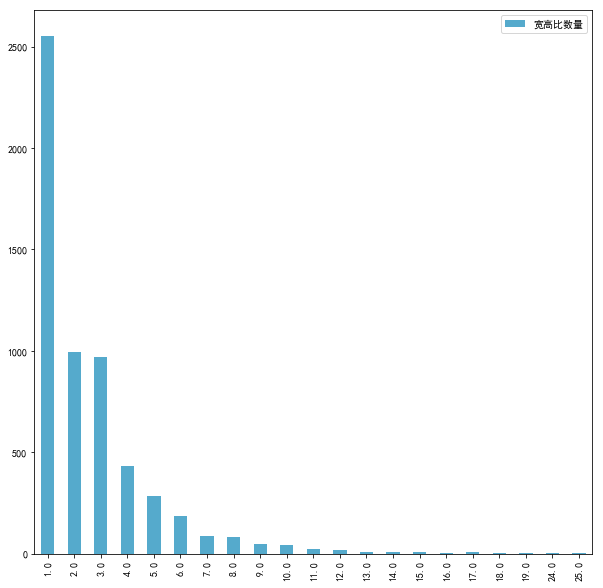

In [86]:
# 统计每种宽高比的个数
box_wh_unique = list(set(box_wh))
box_wh_count=[box_wh.count(i) for i in box_wh_unique]

# 绘图
wh_df = pd.DataFrame(box_wh_count,index=box_wh_unique,columns=['宽高比数量'])
wh_df.plot(kind='bar',color="#55aacc")

In [238]:
category_dic

{0: '背景',
 1: '瓶盖破损',
 2: '瓶盖变形',
 3: '瓶盖坏边',
 4: '瓶盖打旋',
 5: '瓶盖断点',
 6: '标贴歪斜',
 7: '标贴起皱',
 8: '标贴气泡',
 9: '喷码正常',
 10: '喷码异常'}